In [2]:
import pandas as pd
daf=pd.read_excel('4th_july.xlsx','3718')
daf.head()

,OBU_ID,KMPL,RED,GREEN,YELLOW,IDLE
0,1240,2.914945,4.765146,45.677332,35.534377,13.955071
1,1241,3.368209,0.604396,28.846154,40.824176,29.450549
2,1246,3.370760,1.093840,45.077720,31.606218,22.164652
3,1251,1.402340,0.000000,0.000000,0.000000,100.000000
4,1252,2.867187,0.520833,4.166667,10.416667,84.895833


In [3]:
daf = daf.dropna(subset=['KMPL','RED','GREEN','YELLOW','IDLE'])
daf.head()

,OBU_ID,KMPL,RED,GREEN,YELLOW,IDLE
0,1240,2.914945,4.765146,45.677332,35.534377,13.955071
1,1241,3.368209,0.604396,28.846154,40.824176,29.450549
2,1246,3.370760,1.093840,45.077720,31.606218,22.164652
3,1251,1.402340,0.000000,0.000000,0.000000,100.000000
4,1252,2.867187,0.520833,4.166667,10.416667,84.895833


In [4]:
df = daf['RED']+daf['GREEN']+daf['YELLOW']
daf['SUM'] = df

In [5]:
daf.head()

,OBU_ID,KMPL,RED,GREEN,YELLOW,IDLE,SUM
0,1240,2.914945,4.765146,45.677332,35.534377,13.955071,85.976855
1,1241,3.368209,0.604396,28.846154,40.824176,29.450549,70.274725
2,1246,3.370760,1.093840,45.077720,31.606218,22.164652,77.777778
3,1251,1.402340,0.000000,0.000000,0.000000,100.000000,0.000000
4,1252,2.867187,0.520833,4.166667,10.416667,84.895833,15.104167


In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(daf['SUM'],daf['KMPL'])
#plt.scatter(daf['SUM'],daf['RED'])
#plt.scatter(daf['SUM'],daf['GREEN'])

In [7]:
df1 = daf['RED']+daf['GREEN']+daf['YELLOW']/3
daf['AVG'] = df1
daf.head()

,OBU_ID,KMPL,RED,GREEN,YELLOW,IDLE,SUM,AVG
0,1240,2.914945,4.765146,45.677332,35.534377,13.955071,85.976855,62.287270
1,1241,3.368209,0.604396,28.846154,40.824176,29.450549,70.274725,43.058608
2,1246,3.370760,1.093840,45.077720,31.606218,22.164652,77.777778,56.706966
3,1251,1.402340,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000
4,1252,2.867187,0.520833,4.166667,10.416667,84.895833,15.104167,8.159722


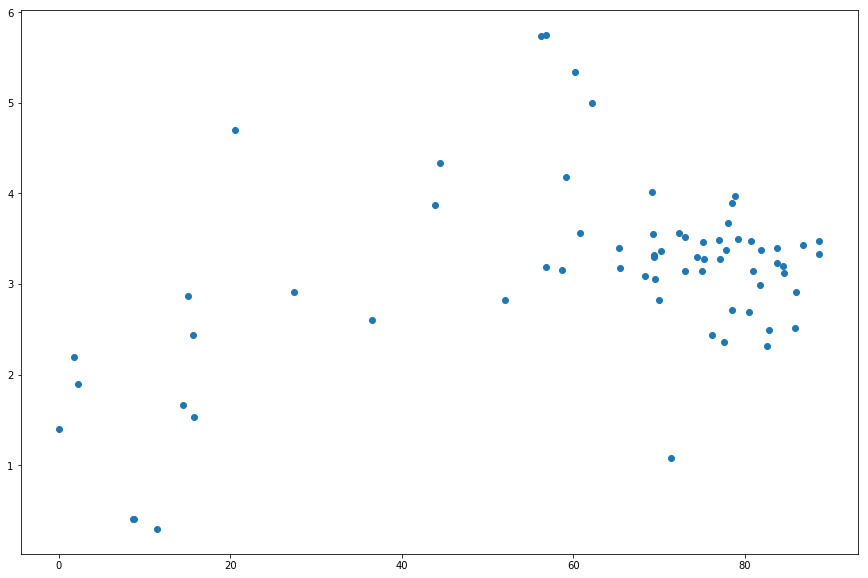

In [8]:
plt.figure(figsize=(15,10))
plt.scatter(daf['SUM'],daf['KMPL'])

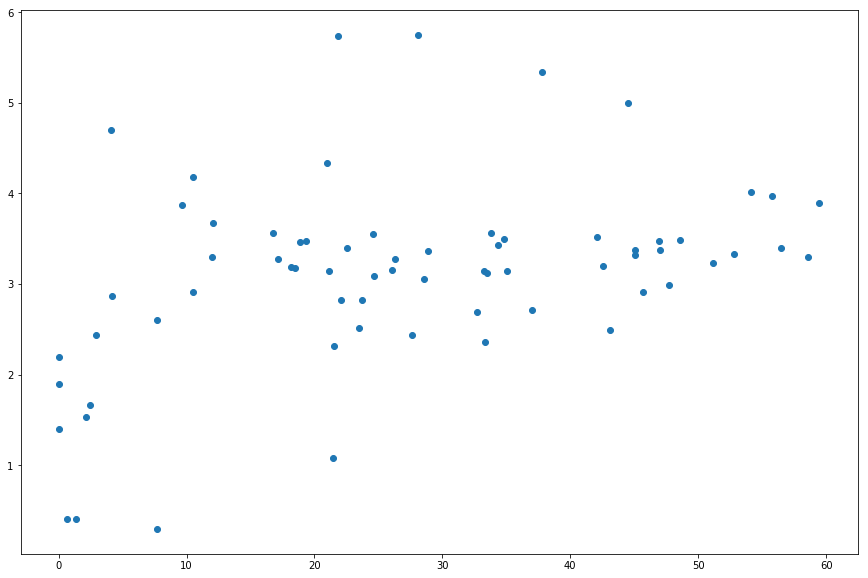

In [9]:
plt.figure(figsize=(15,10))
plt.scatter(daf['GREEN'],daf['KMPL'])

In [11]:
df2=daf.std(axis=1)
daf['STD']=df2
daf.head()
daf.to_csv('param.csv',sep=',')

PermissionError: [Errno 13] Permission denied: 'param.csv'

In [ ]:
plt.figure(figsize=(15,10))
plt.scatter(daf['AVG'],daf['KMPL'])

In [ ]:
import seaborn as sb
sb.heatmap(daf.corr(), annot = True, fmt = '.1f')


In [ ]:
import numpy as np

z=np.array(daf['GREEN']).reshape(-1,1)
w =np.array(daf['SUM']).reshape(-1,1)
v=np.array(daf['IDLE']).reshape(-1,1)


from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(daf[['GREEN','AVG','SUM']],y, test_size=0.2)
x = np.array(X_train).reshape(-1,1)
y = daf['KMPL']

In [ ]:
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression
poly = PolynomialFeatures(degree=3)

QuadraticCoeff_1 = poly.fit_transform(x)
#QuadraticCoeff_2 = poly.fit_transform(z,w)
#QuadraticCoeff_3 = poly.fit_transform(w)


In [ ]:
model = LinearRegression() #SGDRegressor(loss="squared_loss", max_iter=10000)
model.fit(QuadraticCoeff_1,y)
#print(len(model.predict(x)))
#print(len(model.predict(z)))
print(len(model.predict(QuadraticCoeff_1)))

In [ ]:
model.score(daf[['GREEN','AVG','SUM']],y)

In [ ]:
#xx = np.linspace(0, 80, 68).reshape(-1,1)

#yy=np.linspace(0, 80, 68).reshape(-1,1)

#xx_quadratic = poly.fit_transform(xx)
#yy_quadratic=poly.fit_transform(yy)


plt.figure(figsize=(40, 20))
#plt.title("GPS_SPEED VS ENGINE_SPEED",fontsize=60)

#plt.xlabel("GPS_SPEED",fontsize=40)
#plt.ylabel("ENGINE_SPEED",fontsize=40)
plt.tick_params(labelsize =30)

plt.scatter(X_train,Y_train,color='green')
#plt.scatter(daf['AVG'],daf['KMPL'],color='red')
# Plot Regression Solution line

plt.axis([0,80,0,30])
#plt.scatter(xx_quadratic,  model.predict(xx_quadratic),color='green')
#plt.scatter(yy_quadratic,  model.predict(yy_quadratic),color='black')
regression_line_y = model.predict([[0], [70]])
print(regression_line_y)
plt.plot([0,70 ], regression_line_y, 
         color='r', linestyle='-', linewidth=1)